CODE CELL 1: Cleaning the the Little Women and The Blue Castle Books from the Project Gutenberg text files.

Remove headers and footers unnecesary content of the books 

In [2]:
#This function helps to clean the books to remove the headers and footers 
def clean_gutenberg_text(file_path, start_marker, end_marker, output_file):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    # start and end index in the txt file to remove
    start_idx = end_idx = None
    for i, line in enumerate(lines):
        if start_marker in line:
            start_idx = i + 1
        if end_marker in line:
            end_idx = i
            break
    # extracting the content between the marker indices and saving it to a cleaned txt file
    if start_idx is not None and end_idx is not None:
        cleaned_text = lines[start_idx:end_idx]
        with open(output_file, "w", encoding="utf-8") as out:
            out.writelines(cleaned_text)
        print(f"New Cleaned txt file: {output_file}")
    else:
        print(f"File not found {file_path}")
# we have defined the markers of each book here 
clean_gutenberg_text(
    "the_blue_castle.txt",
    "*** START OF THE PROJECT GUTENBERG EBOOK THE BLUE CASTLE: A NOVEL ***",
    "*** END OF THE PROJECT GUTENBERG EBOOK THE BLUE CASTLE: A NOVEL ***",
    "new_the_blue_castle.txt"
)
clean_gutenberg_text(
    "Little_Women.txt",
    "*** START OF THE PROJECT GUTENBERG EBOOK LITTLE WOMEN; OR, MEG, JO, BETH, AND AMY ***",
    "*** END OF THE PROJECT GUTENBERG EBOOK LITTLE WOMEN; OR, MEG, JO, BETH, AND AMY ***",
    "new_little_women.txt"
)

New Cleaned txt file: new_the_blue_castle.txt
New Cleaned txt file: new_little_women.txt


CODE CELL 2: Remove Blank Lines and printing the number of words in the books
- Removing whitespace
- total word counts
- preproceesing steps for sentence tokenisation 

In [3]:
def clean_lines_and_count_words(input_file, output_file):
    with open(input_file, "r", encoding="utf-8") as f:
        lines = f.readlines()
    # whitespace
    #remove blank lines
    cleaned_lines = [line.strip() for line in lines if line.strip()]
    with open(output_file, "w", encoding="utf-8") as f:
        f.write("\n".join(cleaned_lines))
    # Number of words in each cleaned book
    total_words = sum(len(line.split()) for line in cleaned_lines)
    print(f"{output_file} - Total Words: {total_words}")
    return total_words
blue_castle_word_count = clean_lines_and_count_words("new_the_blue_castle.txt", "cleaned_the_blue_castle.txt")
little_women_word_count = clean_lines_and_count_words("new_little_women.txt", "cleaned_little_women.txt")


cleaned_the_blue_castle.txt - Total Words: 68271
cleaned_little_women.txt - Total Words: 192557


CODE CELL 3: Sentence Segmentation

In [4]:
# required libraries
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')  

def analyze_text(input_file, output_file):
    with open(input_file, "r", encoding="utf-8") as f:
        lines = f.readlines()
    
    cleaned_lines = [line.strip() for line in lines if line.strip()]
    full_text = " ".join(cleaned_lines)

    # merging the cleaned lines into one text
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(full_text)
    
    # tokenised the text to sentences 
    sentences = sent_tokenize(full_text)
    num_sentences = len(sentences)
    #total words printing again to check
    total_words = len(full_text.split())
    # checking the shortest and longest sentence this was necesaary for the next steps 
    sentence_lengths = [len(sentence.split()) for sentence in sentences]
    shortest = min(sentence_lengths)
    longest = max(sentence_lengths)

    print(f"{output_file}")
    print(f"Total words: {total_words}")
    print(f"Total sentences: {num_sentences}")
    print(f"Shortest sentence length: {shortest} words")
    print(f"Longest sentence length: {longest} words\n")

analyze_text("cleaned_the_blue_castle.txt", "cleaned_the_blue_castle.txt")
analyze_text("cleaned_little_women.txt", "cleaned_little_women.txt")


[nltk_data] Downloading package punkt to C:\Users\pc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


cleaned_the_blue_castle.txt
Total words: 68271
Total sentences: 5182
Shortest sentence length: 1 words
Longest sentence length: 187 words

cleaned_little_women.txt
Total words: 192557
Total sentences: 9170
Shortest sentence length: 1 words
Longest sentence length: 234 words



CODE CELL 4: Merging both the books - lowercasing, removing punctuation, removal of stopwords, and rarewords removal 

We removed the rarewords because it will not give us good similarity or cooccurence between words.

In [5]:
# required libraries for the next 
import string
from nltk.corpus import stopwords
from collections import Counter
nltk.download("stopwords")

def load_and_tokenize(file1, file2):
    with open(file1, "r", encoding="utf-8") as f1, open(file2, "r", encoding="utf-8") as f2:
        text = f1.read() + " " + f2.read()
    #lowercasing and punctuation removal
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    # tokenize the words and remove stopwords
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return filtered_tokens

def remove_rare_words(tokens):
    # removing the rare words that has only 1 occurence in the text
    freq = Counter(tokens)
    cleaned = [word for word in tokens if freq[word] > 1]
    return cleaned, freq

tokens = load_and_tokenize("cleaned_the_blue_castle.txt", "cleaned_little_women.txt")
filtered_tokens, freq_dist = remove_rare_words(tokens)


with open("merged_filtered_tokens.txt", "w", encoding="utf-8") as f:
    f.write(" ".join(filtered_tokens))

print(f"Total tokens (after stopword removal): {len(tokens)}")
print(f"Tokens after removing rare words: {len(filtered_tokens)}")
print(f"Unique words: {len(set(filtered_tokens))}")


[nltk_data] Downloading package stopwords to C:\Users\pc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total tokens (after stopword removal): 128701
Tokens after removing rare words: 122223
Unique words: 7973


CODE CELL 5: sentence segmentation, tokenzation, and lemmatisation

In [15]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words("english"))

# merging the two books cleaned files into one 
with open("cleaned_the_blue_castle.txt", "r", encoding="utf-8") as f1, \
     open("cleaned_little_women.txt", "r", encoding="utf-8") as f2:
    merged_text = f1.read() + " " + f2.read()

#sentence tokenization
sentences = sent_tokenize(merged_text)

# data preprocessing steps : tokenize, lowercase, remove stopwords, lemmatize
def preprocess_sentence(sentence):
    doc = nlp(sentence.lower())
    return [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]
cleaned_sentences = [preprocess_sentence(sent) for sent in sentences if sent.strip()]

merged_tokens = [token for sent in cleaned_sentences for token in sent]

# saving the results in a file
with open("merged_lemmatised_tokens.txt", "w", encoding="utf-8") as f:
    f.write(" ".join(merged_tokens))

print(f"Total merged sentences: {len(cleaned_sentences)}")
print(f"Total lemmatized tokens: {len(merged_tokens)}")
print(f"Unique lemmatized tokens: {len(set(merged_tokens))}")


Total merged sentences: 14351
Total lemmatized tokens: 135268
Unique lemmatized tokens: 9946


CODE CELL 6: Named Entity Recognition (NER) — Filter High-Frequency Character Names - proper Nouns in the book

In [16]:
# there is an high occurence of the charater names in the little women book 
# Little Women characters like Jo, Amy, Meg, and Beth are mentioned frequently
# when we checked the 100 words for clustering
# so before performing the clustering we are preprocessing by removing the character or proper names
# which appear more than 5 times in the text 

import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2_000_000 # increased it again to handle the large text file
with open("cleaned_the_blue_castle.txt", "r", encoding="utf-8") as f1, \
     open("cleaned_little_women.txt", "r", encoding="utf-8") as f2:
    merged_text = f1.read() + " " + f2.read()

# Named entity recognition to get the proper nouns or character names
doc = nlp(merged_text)

#PERSON entities
person_entities = [ent.text.strip().lower() for ent in doc.ents if ent.label_ == "PERSON"]
entity_counter = Counter(person_entities)

# filtering out the names witht custom stopwords
custom_stopnames = set(name for name, count in entity_counter.items() if count >= 5)

print(f"Removed {len(custom_stopnames)} character names.")
print("Names removed:", list(custom_stopnames)[:10])
with open("custom_character_stopwords.txt", "w", encoding="utf-8") as f:
    for name in sorted(custom_stopnames):
        f.write(name + "\n")


Removed 104 character names.
Names removed: ['barney snaith', 'mamma', 'good luck', 'stalling', 'barney', 'daisy', 'fred', 'frank', 'demi', 'hagar']


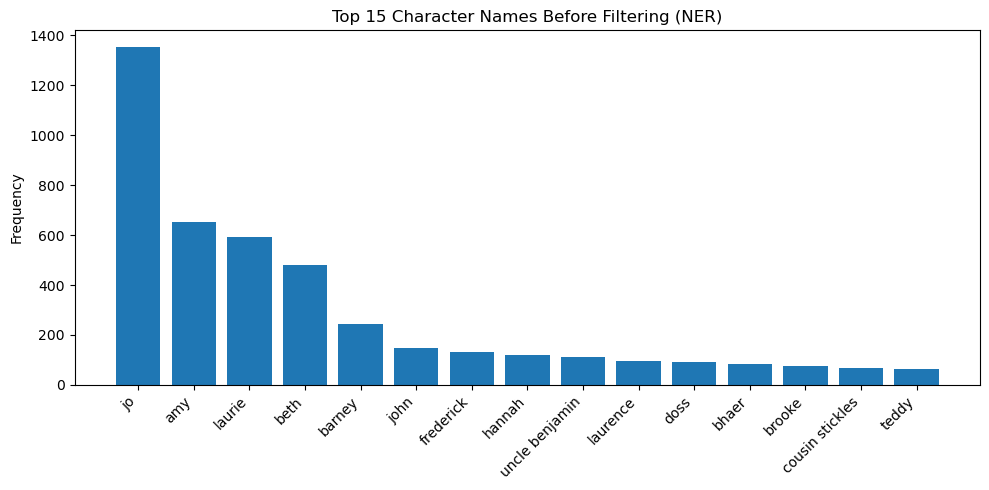

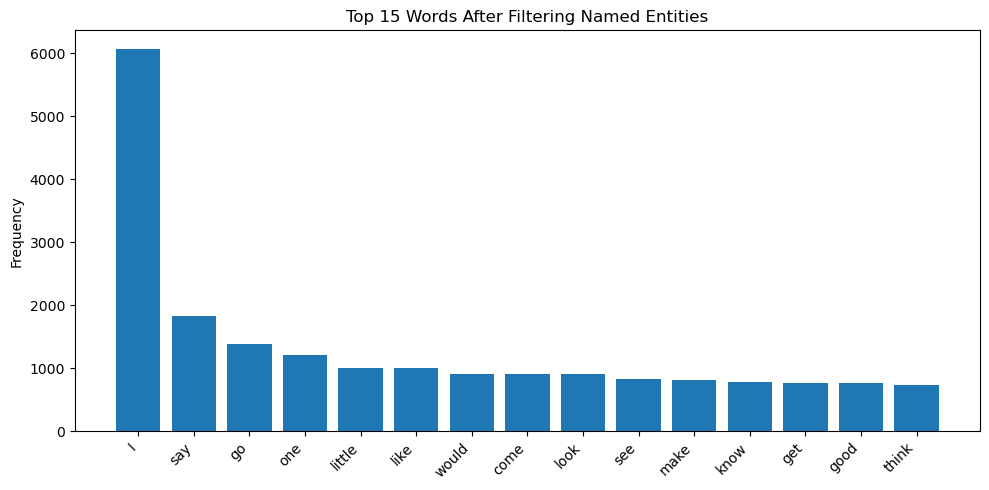

In [18]:
# NOT NEEDED but to see if the names have been removed or not
import matplotlib.pyplot as plt
# before filtering
top_entities = entity_counter.most_common(15)
names, counts = zip(*top_entities)
plt.figure(figsize=(10, 5))
plt.bar(names, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 15 Character Names Before Filtering (NER)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#after filtering
from collections import Counter
with open("merged_lemmatised_tokens.txt", "r", encoding="utf-8") as f:
    all_tokens = f.read().split()
filtered_tokens = [tok for tok in all_tokens if tok not in custom_stopnames]
filtered_counter = Counter(filtered_tokens)
top_filtered = filtered_counter.most_common(15)
words, freqs = zip(*top_filtered)
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.xticks(rotation=45, ha="right")
plt.title("Top 15 Words After Filtering Named Entities")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


CODE CELL 7: Part - Of - Speech Tagging - POS - [NOUN, ADJ, ADV]

In [19]:
import spacy
from collections import defaultdict, Counter
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2_000_000

# custom stopwords for the names used again 
with open("custom_character_stopwords.txt", "r", encoding="utf-8") as f:
    custom_stopnames = set(line.strip() for line in f)

with open("cleaned_the_blue_castle.txt", "r", encoding="utf-8") as f1, \
     open("cleaned_little_women.txt", "r", encoding="utf-8") as f2:
    merged_text = f1.read() + " " + f2.read()
doc = nlp(merged_text.lower())

# Only using the noun, adjectives and adverbs 
valid_tags = {"NOUN", "ADJ", "ADV"}
pos_groups = defaultdict(list)

for token in doc:
    lemma = token.lemma_.lower()
    if token.pos_ in valid_tags and token.is_alpha and lemma not in custom_stopnames:
        pos_groups[token.pos_].append(lemma)

for pos in pos_groups:
    print(f"\nTokens for {pos}:")
    counter = Counter(pos_groups[pos])
    for word, count in counter.most_common(10):
        print(f"{word}: {count}")



Tokens for NOUN:
time: 507
mother: 500
girl: 499
thing: 492
day: 445
hand: 367
face: 360
one: 353
eye: 342
heart: 302

Tokens for ADJ:
little: 990
good: 706
old: 622
young: 348
great: 274
dear: 244
happy: 235
other: 232
new: 226
poor: 220

Tokens for ADV:
so: 1301
never: 626
very: 595
now: 530
then: 501
well: 415
away: 396
as: 370
only: 362
just: 346


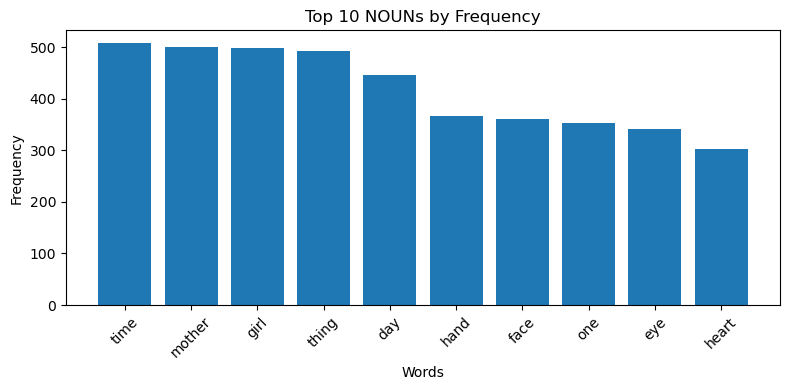

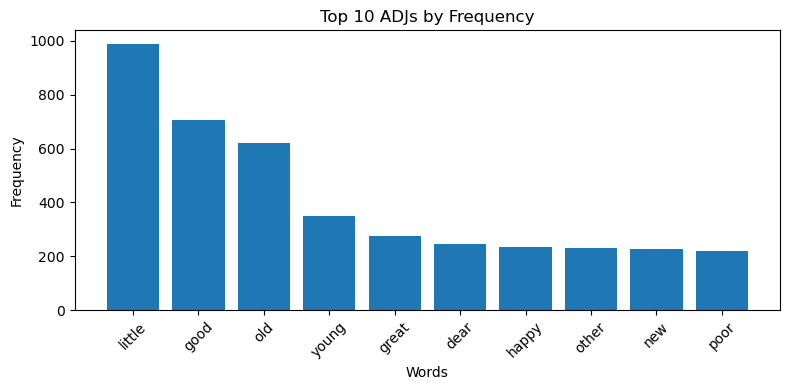

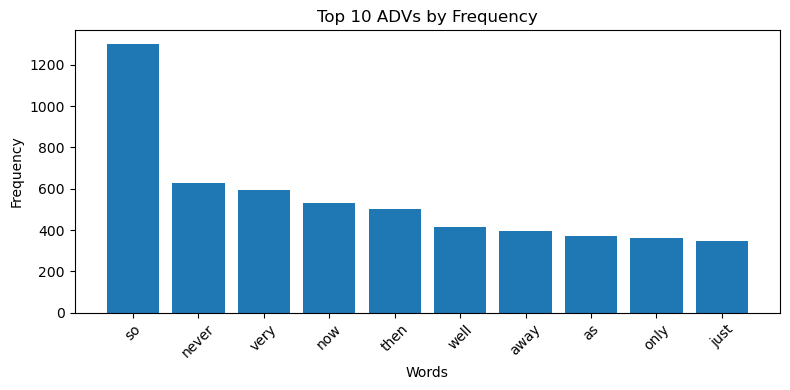

In [20]:
import matplotlib.pyplot as plt

#plotting the top10 words in the NOUN, ADJ, ADV so we can check 
for pos in ['NOUN', 'ADJ', 'ADV']:
    if pos in pos_groups:
        counter = Counter(pos_groups[pos])
        common = counter.most_common(10)
        words, freqs = zip(*common)
        
        plt.figure(figsize=(8, 4))
        plt.bar(words, freqs)
        plt.title(f"Top 10 {pos}s by Frequency")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


CODE CELL 8: Option A Part of Speech tagging - POS

100 total (50 NOUN, 25 ADJ, 25 ADV)

used the random.seed so the 100 content words do not vary every time 

In [21]:
import random

# we are extracting the unique tokens with a random seed to have the same content words throughout
def get_top_unique_sample(tokens, top_n, sample_n, already_selected=set()):
    counter = Counter(tokens)
    top_words_for_optiona = [word for word, _ in counter.most_common(top_n) if word not in already_selected]
    sampled = random.sample(top_words_for_optiona, min(sample_n, len(top_words_for_optiona)))
    return sampled
random.seed(42)

# final option A list for 100 content words for the task 
final_optiona = []
seen = set()

# we used a split of 50 nouns, 25 adjective and 25 adverbs 
for pos_tag, quota in [("NOUN", 50), ("ADJ", 25), ("ADV", 25)]:
    if pos_tag in pos_groups:
        selected = get_top_unique_sample(pos_groups[pos_tag], top_n=200, sample_n=quota, already_selected=seen)
        final_optiona.extend(selected)
        seen.update(selected)

# again used the shuffle to get a final optiona list 
random.shuffle(final_optiona)
with open("final_optiona.txt", "w", encoding="utf-8") as f:
    for word in final_optiona:
        f.write(word + "\n")

print(f"final_optiona.txt with {len(final_optiona)} unique words.")
print(final_optiona)


final_optiona.txt with 100 unique words.
['stupid', 'sly', 'sofa', 'death', 'creature', 'rest', 'desperately', 'face', 'wood', 'dead', 'road', 'minute', 'step', 'sight', 'sorrow', 'side', 'child', 'early', 'secret', 'happiness', 'eye', 'heartily', 'calm', 'corner', 'respectfully', 'thoughtfully', 'way', 'olive', 'several', 'turn', 'such', 'home', 'impossible', 'funny', 'only', 'place', 'certainly', 'mother', 'fat', 'grand', 'second', 'shoulder', 'therefore', 'delightfully', 'plainly', 'plan', 'doctor', 'gracefully', 'half', 'full', 'work', 'grateful', 'friend', 'ring', 'tear', 'one', 'immediately', 'deerwood', 'much', 'awful', 'aunt', 'in', 'chance', 'jolly', 'light', 'evening', 'deal', 'hat', 'afternoon', 'seldom', 'pale', 'over', 'morning', 'chair', 'quickly', 'quietly', 'low', 'whole', 'first', 'few', 'different', 'fire', 'lady', 'door', 'moment', 'drunk', 'of', 'white', 'merry', 'quite', 'twice', 'there', 'evidently', 'ill', 'change', 'will', 'glove', 'thin', 'ear', 'paper']


CODE CELL 9: Final Option B – LDA Topic Words

In [22]:
from gensim import corpora, models
from collections import defaultdict
import random

# filtering the sentences 
filtered_sentences = [
    [word for word in sent if word not in custom_stopnames and word.lower() != "i"]
    for sent in cleaned_sentences
]

# created the dictionary of the tokens of the filetered sentences for the topic modelling 
dictionary = corpora.Dictionary(filtered_sentences)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in filtered_sentences]

#training the LDA model for the dictionary with 7 topics 
lda_model = models.LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=7,
                            random_state=42,
                            passes=10,
                            alpha='auto')

# extracting the top words per topic
topic_words_set = set()
words_per_topic = 30  # we used 30 top words for each of the topic to then create a 100 content words from this list 

for topic_id in range(lda_model.num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=words_per_topic)
    for word, _ in topic_terms:
        topic_words_set.add(word.lower())

# 100 content uniue tokens with random seed for reproducibility
optionb = sorted(topic_words_set)
random.seed(42)
final_optionb = random.sample(optionb, min(100, len(optionb)))
with open("final_optionb.txt", "w", encoding="utf-8") as f:
    for word in final_optionb:
        f.write(word + "\n")

print(f"final_optionb.txt with {len(final_optionb)} unique topic words.")
print(final_optionb)


final_optionb.txt with 100 unique topic words.
['take', 'could', 'away', 'whisper', 'half', 'gentleman', 'follow', 'door', 'well', 'comma', 'together', 'satisfaction', 'clause', 'sort', 'note', 'big', 'back', 'cold', 'find', 'four', 'quote', 'spite', 'write', 'settle', 'fancy', 'tender', 'way', 'night', 'flower', 'order', 'smile', 'hand', 'act', 'drop', 'wait', 'letter', 'time', 'dress', 'try', 'learn', 'would', 'upon', 'make', 'colon', 'list', 'lie', 'god', 'blue', 'piece', 'run', 'daughter', 'lovely', 'character', 'see', 'hide', 'little', 'fall', 'cent', 'thank', 'forgive', 'head', 'show', 'true', 'come', 'splendid', 'table', 'period', 'look', 'duty', 'lose', 'line', 'story', 'lay', 'dear', 'like', 'play', 'tail', 'instead', 'bind', 'hour', 'illustration', 'child', 'good', 'receive', 'sister', 'round', 'room', 'face', 'professor', 'small', 'sound', 'rich', 'yes', 'please', 'trouble', 'manner', 'mine', 'use', 'cry', 'also']


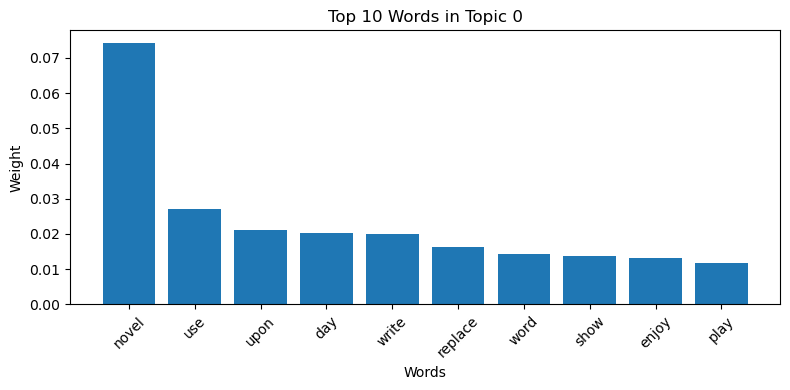

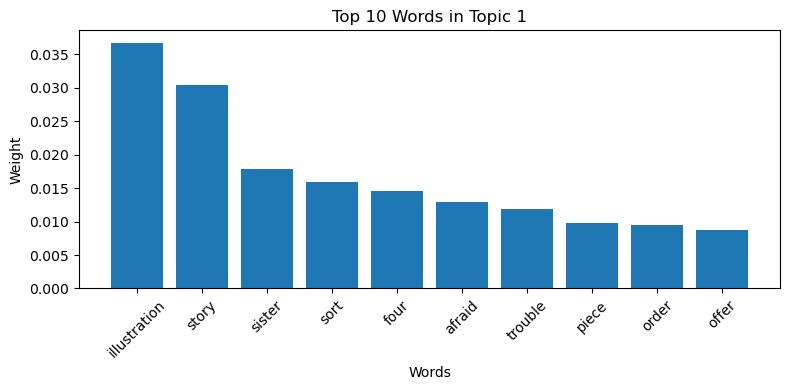

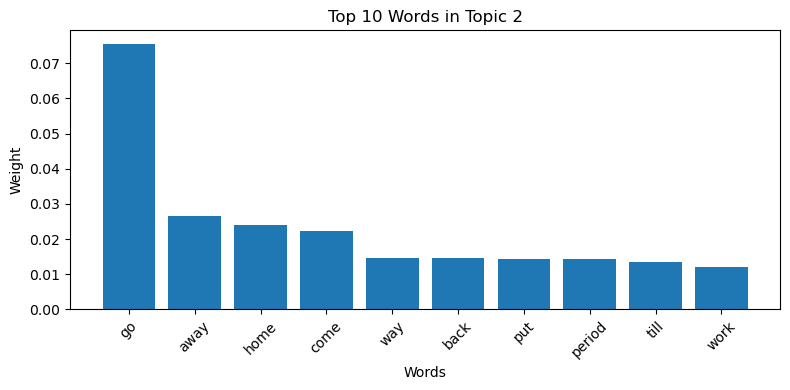

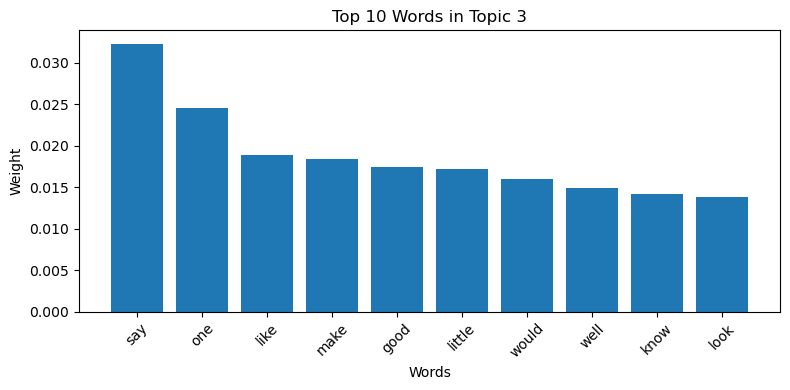

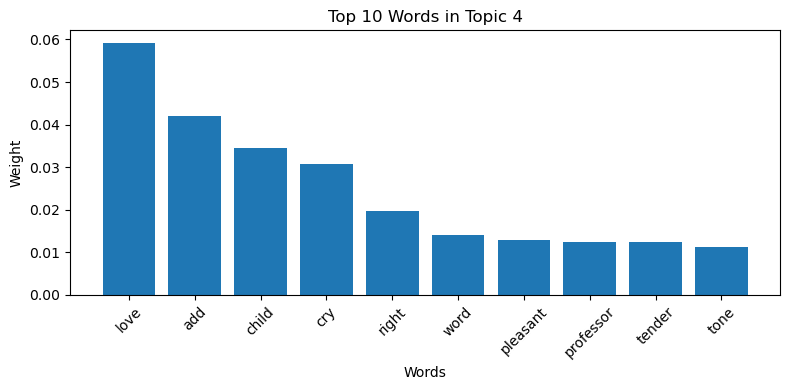

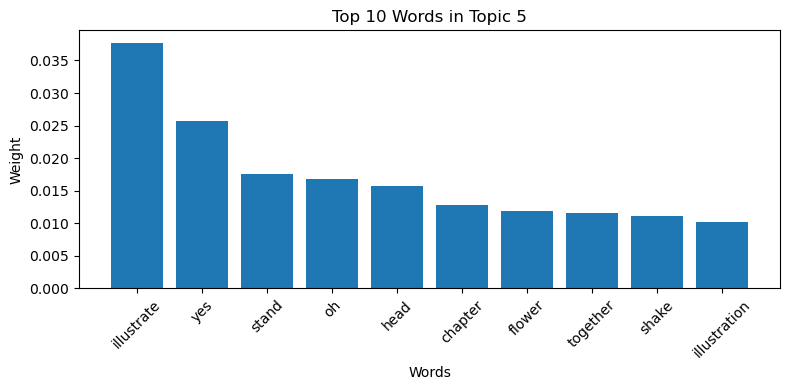

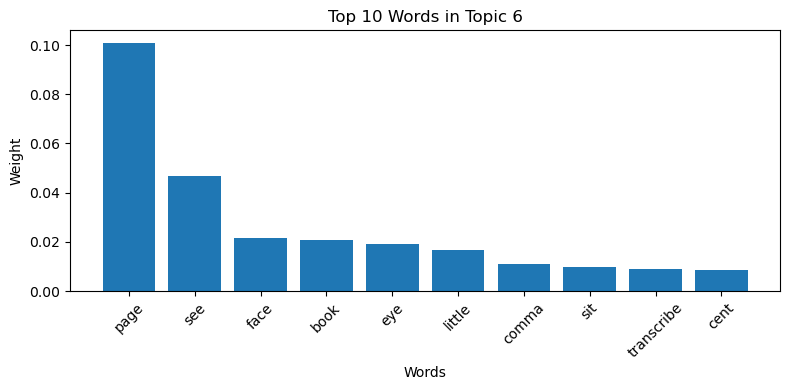

In [23]:
# plotting the top 10 words in each of the topics from the LDA topic modelling 
for topic_id in range(lda_model.num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=10)
    words, weights = zip(*topic_terms)

    plt.figure(figsize=(8, 4))
    plt.bar(words, weights)
    plt.title(f"Top 10 Words in Topic {topic_id}")
    plt.xlabel("Words")
    plt.ylabel("Weight")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


CODE CELL 10: Venn Diagram to Compare the lists of Option A vs Option B

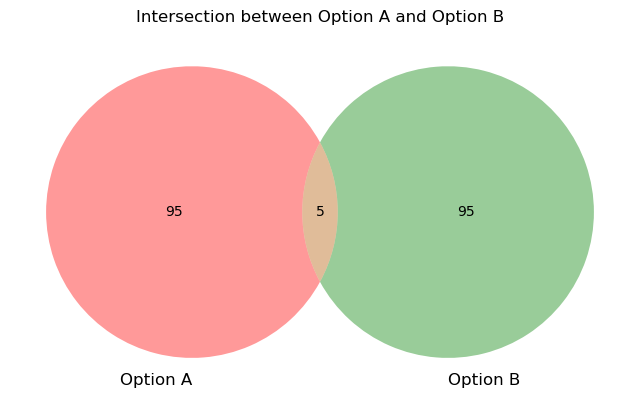

Words present in both A and B: 5
Words present only in A: 95
Words present only in B: 95


In [24]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Loading the final option a list and final option b list 
with open("final_optiona.txt", "r", encoding="utf-8") as f:
    final_optiona = [line.strip() for line in f.readlines()]
with open("final_optionb.txt", "r", encoding="utf-8") as f:
    final_optionb = [line.strip() for line in f.readlines()]

# for venn diagram 
# venn diagram has sets 
set_a = set(final_optiona)
set_b = set(final_optionb)

# Plotting the venn diagram to check the uniquness of the lists
plt.figure(figsize=(8, 6))
venn2([set_a, set_b], set_labels=("Option A", "Option B"))
plt.title("Intersection between Option A and Option B")
plt.show()

print(f"Words present in both A and B: {len(set_a & set_b)}")
print(f"Words present only in A: {len(set_a - set_b)}")
print(f"Words present only in B: {len(set_b - set_a)}")


In [25]:
print("10 unique tokens in A:")
print(sorted(set_a - set_b)[:10])
print("\n10 unique tokens in B:")
print(sorted(set_b - set_a)[:10])

10 unique tokens in A:
['afternoon', 'aunt', 'awful', 'calm', 'certainly', 'chair', 'chance', 'change', 'corner', 'creature']

10 unique tokens in B:
['act', 'also', 'away', 'back', 'big', 'bind', 'blue', 'cent', 'character', 'clause']


both the list pf vocabularies are final and nicely balanced

CODE CELL 11: Co-Occurrence Matrices for Option A & Option B

In [26]:
import pandas as pd
from collections import defaultdict
from tqdm import tqdm

# the clean and merged tokens after preprocessing 
with open("merged_lemmatised_tokens.txt", "r", encoding="utf-8") as f:
    merged_tokens = f.read().split()

context_window = 4 
tqdm.pandas()

# co-occurence matrix creation
def build_cooccurrence_matrix(vocab_list, tokens, window_size=4):
    vocab = set(vocab_list)
    matrix = defaultdict(lambda: defaultdict(int))
    vocab_index = {word: i for i, word in enumerate(vocab_list)}
    
    for i, token in enumerate(tokens):
        if token not in vocab:
            continue
        context_start = max(0, i - window_size)
        context_end = min(len(tokens), i + window_size + 1)
        context = tokens[context_start:i] + tokens[i+1:context_end]
        
        for context_word in context:
            if context_word in vocab:
                matrix[token][context_word] += 1
    
    df = pd.DataFrame(index=vocab_list, columns=vocab_list).fillna(0)
    for row in matrix:
        for col in matrix[row]:
            df.at[row, col] = matrix[row][col]
    return df

co_matrix_a = build_cooccurrence_matrix(final_optiona, merged_tokens, context_window)
co_matrix_a.to_csv("cooccurrence_matrix_optiona.csv")

co_matrix_b = build_cooccurrence_matrix(final_optionb, merged_tokens, context_window)
co_matrix_b.to_csv("cooccurrence_matrix_optionb.csv")


C:\Users\pc\AppData\Local\Temp\ipykernel_19064\3256943465.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.DataFrame(index=vocab_list, columns=vocab_list).fillna(0)
C:\Users\pc\AppData\Local\Temp\ipykernel_19064\3256943465.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.DataFrame(index=vocab_list, columns=vocab_list).fillna(0)


Code cell 12

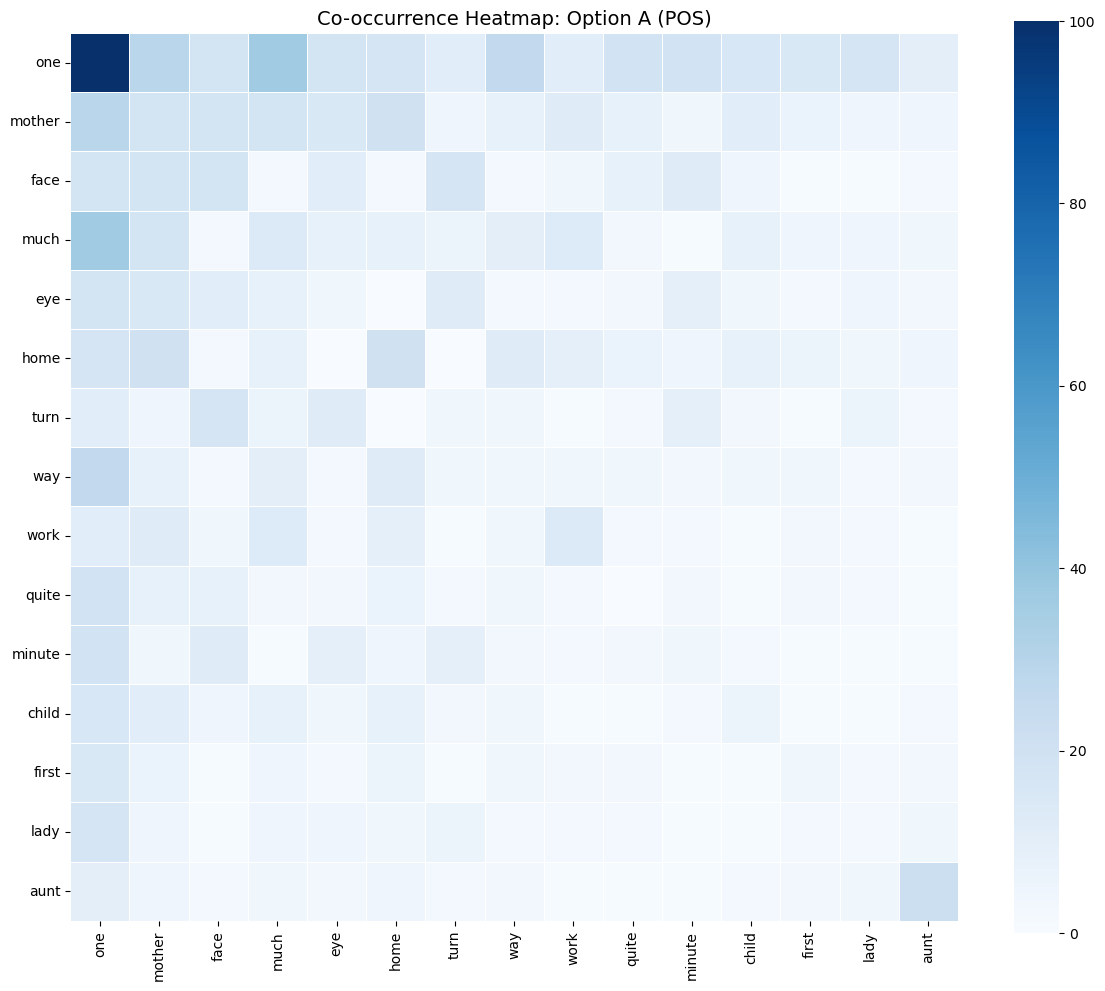

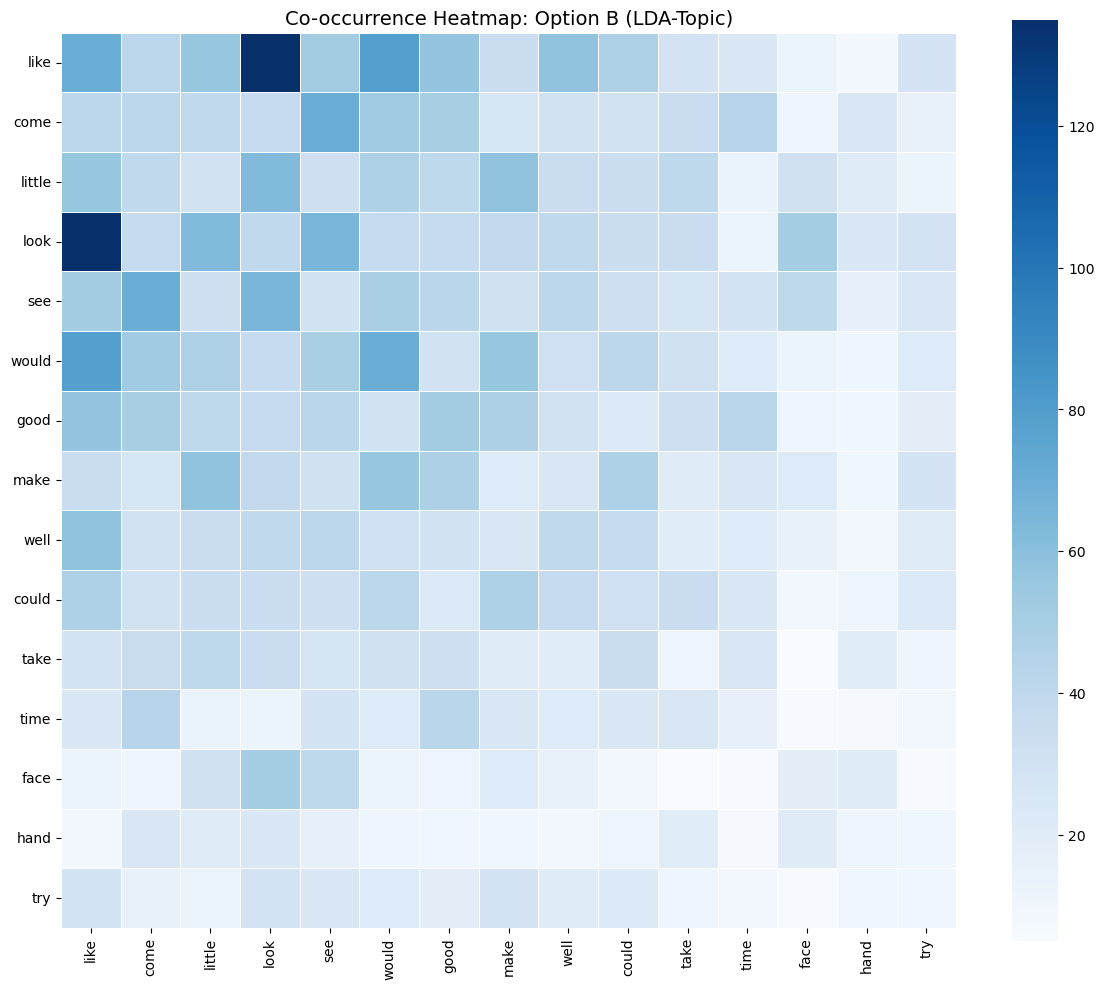

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

co_matrix_a = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)
co_matrix_b = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)

# plotting a heatmap for visualizing the option A and Option B lists co-occurence values
def plot_heatmap(matrix, title, top_n=30):
    row_sums = matrix.sum(axis=1)
    top_words = row_sums.sort_values(ascending=False).head(top_n).index
    subset = matrix.loc[top_words, top_words]

    plt.figure(figsize=(12, 10))
    sns.heatmap(subset, cmap="Blues", linewidths=0.5, square=True)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Only plotting the heatmap for the top 15 words in the list
plot_heatmap(co_matrix_a, "Co-occurrence Heatmap: Option A (POS)", top_n=15)
plot_heatmap(co_matrix_b, "Co-occurrence Heatmap: Option B (LDA-Topic)", top_n=15)


Code cell 13

In [29]:
import numpy as np
import pandas as pd

df = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)
matrix = df.values
words = df.columns

# top 10 co-occurring word pairs in option a 
def top_pairs(matrix, words, top_n=10):
    pairs = []
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            pairs.append(((words[i], words[j]), matrix[i][j]))
    sorted_pairs = sorted(pairs, key=lambda x: x[1], reverse=True)
    return sorted_pairs[:top_n]

print("Top 10 co-occurring word pairs (Option A):")
for (w1, w2), freq in top_pairs(matrix, words):
    print(f"{w1} - {w2}: {int(freq)}")


Top 10 co-occurring word pairs (Option A):
one - much: 37
mother - one: 29
way - one: 26
home - mother: 20
minute - one: 19
one - quite: 19
face - mother: 18
face - one: 18
side - one: 18
eye - one: 18


Code cell 14 - Co-occurrence to a Distance Matrix

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# Computing the cosine similarityoption A list
cosine_sim_matrix = cosine_similarity(matrix)

# saving to a csv file to manually check 
cosine_df = pd.DataFrame(cosine_sim_matrix, index=words, columns=words)
cosine_df.to_csv("cosine_similarity_optiona.csv")
print("saved to cosine_similarity_optiona.csv")


saved to cosine_similarity_optiona.csv


In [36]:
from sklearn.metrics.pairwise import euclidean_distances

# computing the euclidea distances of option A list
euclidean_matrix = euclidean_distances(matrix)

# Convert to DataFrame
euclidean_df = pd.DataFrame(euclidean_matrix, index=words, columns=words)
euclidean_df.to_csv("euclidean_distance_optiona.csv")
print("saved to euclidean_distance_optiona.csv")


saved to euclidean_distance_optiona.csv


In [33]:
from sklearn.preprocessing import normalize

# Row-wise normalization (L2 norm)
normalized_matrix = normalize(matrix, norm="l2", axis=1)
norm_cosine_df = pd.DataFrame(cosine_similarity(normalized_matrix), index=words, columns=words)
norm_cosine_df.to_csv("normalized_cosine_similarity_optiona.csv")
print("saved to normalized_cosine_similarity_optiona.csv")


saved to normalized_cosine_similarity_optiona.csv


Code Cell -  15 - PCA - Dimentionality reduction projection of Option A and Option B 

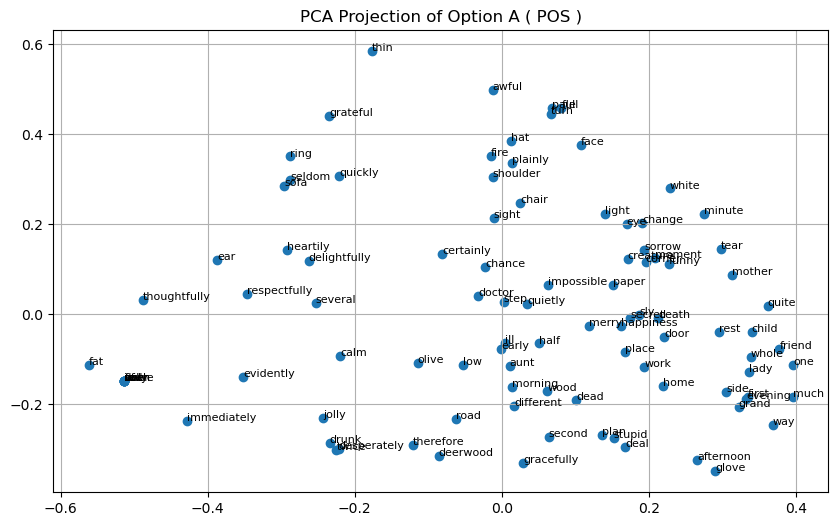

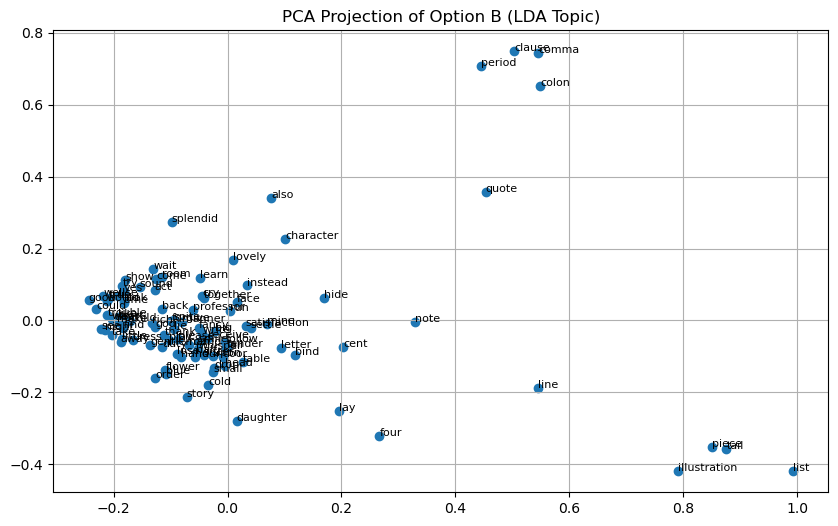

,Top A Co-occurring Pairs,Top B Co-occurring Pairs
0,much & one (37),like & look (135)
1,one & much (37),look & like (135)
2,one & mother (29),like & would (79)
3,mother & one (29),would & like (79)
4,way & one (26),come & see (70)


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_distances
from sklearn.decomposition import PCA

# loding the co-occurrence matrices for the option a and option b lists
optiona_df = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)
optionb_df = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)

#filling the missing values to 0
optiona_df = optiona_df.fillna(0)
optionb_df = optionb_df.fillna(0)

# normalize each row vector to unit length (L2 norm)
def normalize_matrix(df):
    return pd.DataFrame(
        normalize(df, norm="l2", axis=1),
        index=df.index,
        columns=df.columns
    )

optiona_norm = normalize_matrix(optiona_df)
optionb_norm = normalize_matrix(optionb_df)

# calculating the cosine similarity for the option A 
optiona_distance = pd.DataFrame(
    cosine_distances(optiona_norm),
    index=optiona_df.index,
    columns=optiona_df.columns
)
# calculating the cosine similarity for the option B
optionb_distance = pd.DataFrame(
    cosine_distances(optionb_norm),
    index=optionb_df.index,
    columns=optionb_df.columns
)

# PCA projection of word vectors (Option A)
def plot_pca(matrix, labels, title):
    pca = PCA(n_components=2)
    coords = pca.fit_transform(matrix)
    plt.figure(figsize=(10, 6))
    plt.scatter(coords[:, 0], coords[:, 1])
    for i, word in enumerate(labels):
        plt.annotate(word, (coords[i, 0], coords[i, 1]), fontsize=8)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_pca(optiona_norm.values, optiona_norm.index, "PCA Projection of Option A ( POS )")
plot_pca(optionb_norm.values, optionb_norm.index, "PCA Projection of Option B (LDA Topic)")

# printing the top co-occuring word pairs
def top_cooccurring_pairs(df, top_n=5):
    df = df.copy()
    np.fill_diagonal(df.values, 0) 
    pairs = (
        df.stack()
        .sort_values(ascending=False)
        .reset_index()
        .rename(columns={"level_0": "word1", "level_1": "word2", 0: "cooccurrence"})
    )
    return pairs.head(top_n)
top_a = top_cooccurring_pairs(optiona_df)
top_b = top_cooccurring_pairs(optionb_df)

summary_table = pd.DataFrame({
    "Top A Co-occurring Pairs": top_a.apply(lambda row: f"{row['word1']} & {row['word2']} ({row['cooccurrence']})", axis=1),
    "Top B Co-occurring Pairs": top_b.apply(lambda row: f"{row['word1']} & {row['word2']} ({row['cooccurrence']})", axis=1)
})
display(summary_table)


Code Cell -  16

In [38]:
import pandas as pd
import numpy as np
from IPython.display import display

# loding the co occuring matrices
df_a = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)
df_b = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)

# extracting the top co-occurring word pairs
def get_top_cooccurrences(df, top_n=10):
    upper_triangle = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))  # use np instead of pd.np
    stacked = upper_triangle.stack().reset_index()
    stacked.columns = ["word1", "word2", "cooccurrence"]
    return stacked.sort_values(by="cooccurrence", ascending=False).head(top_n)

# from each option top coocuring pairs
top_a = get_top_cooccurrences(df_a)
top_b = get_top_cooccurrences(df_b)

summary_table = pd.DataFrame({
    "Top A Co-occurring Pairs": top_a.apply(lambda row: f"{row['word1']} & {row['word2']} ({row['cooccurrence']})", axis=1),
    "Top B Co-occurring Pairs": top_b.apply(lambda row: f"{row['word1']} & {row['word2']} ({row['cooccurrence']})", axis=1)
})
display(summary_table)


,Top A Co-occurring Pairs,Top B Co-occurring Pairs
719,face & one (18.0),NaN
829,NaN,well & like (58.0)
1077,minute & one (19.0),NaN
1419,side & one (18.0),NaN
1510,NaN,back & come (63.0)
1824,eye & one (18.0),NaN
2277,way & one (26.0),NaN
2609,home & mother (20.0),NaN
3014,mother & one (29.0),NaN
3017,mother & much (18.0),NaN


Code Cell -  17

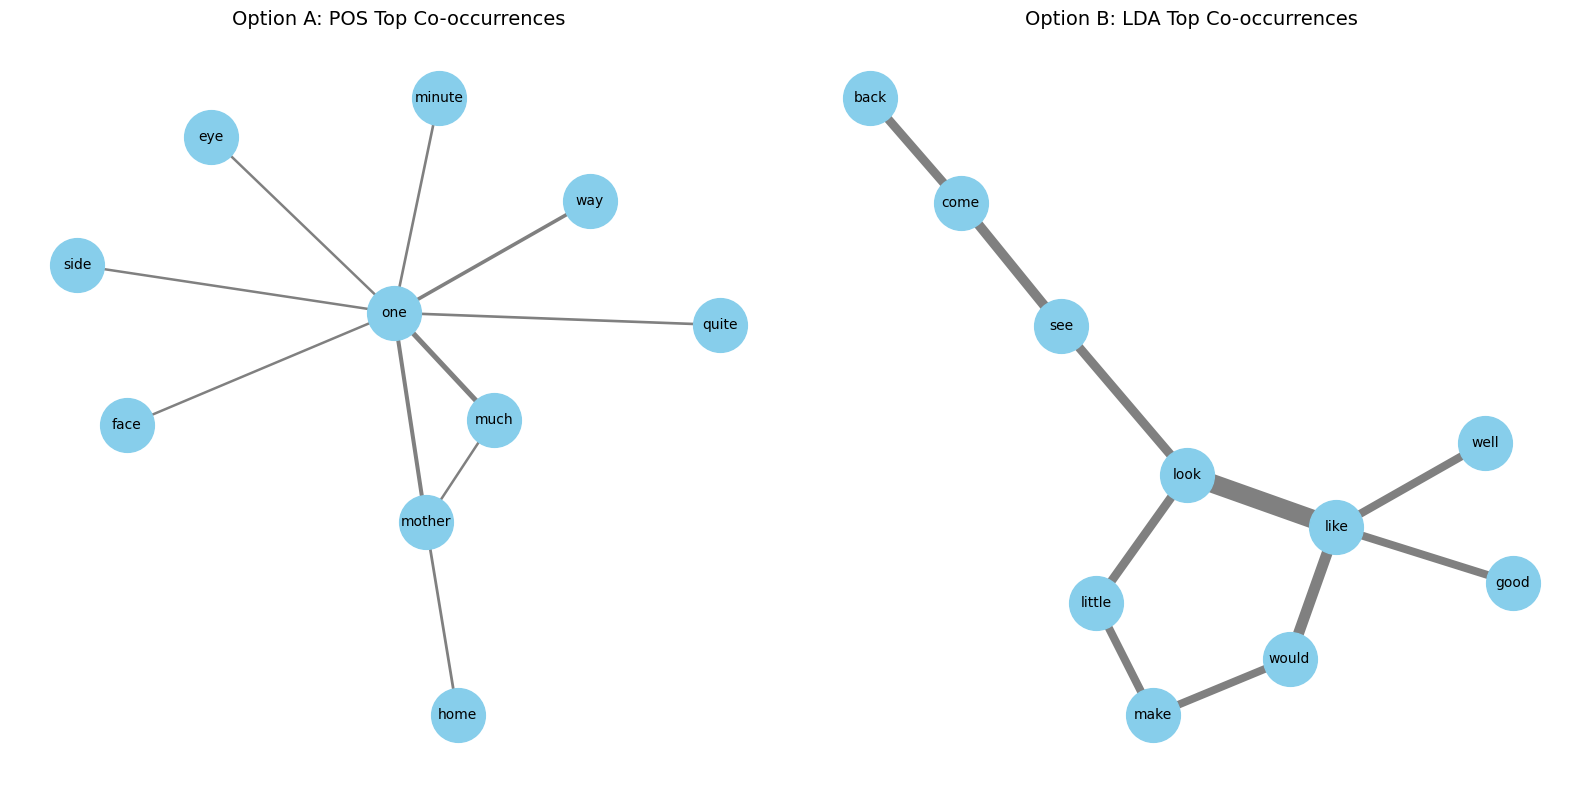

In [40]:
# here we are plotting the network graph to see the word pairs 
import networkx as nx
import matplotlib.pyplot as plt

df_a = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)
df_b = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)

def get_top_cooccurrence_pairs(df, top_n=10):
    upper_triangle = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
    stacked = upper_triangle.stack().reset_index()
    stacked.columns = ["word1", "word2", "cooccurrence"]
    return stacked.sort_values(by="cooccurrence", ascending=False).head(top_n)

top_a_pairs = get_top_cooccurrence_pairs(df_a)
top_b_pairs = get_top_cooccurrence_pairs(df_b)

# Function to draw a co-occurrence network
def draw_network_from_df(df, title, ax):
    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row['word1'], row['word2'], weight=row['cooccurrence'])

    pos = nx.spring_layout(G, seed=42)
    weights = [G[u][v]['weight'] / 10 for u, v in G.edges()] 
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500,
            width=weights, edge_color='gray', font_size=10, ax=ax)
    ax.set_title(title, fontsize=14)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
draw_network_from_df(top_a_pairs, "Option A: POS Top Co-occurrences", axes[0])
draw_network_from_df(top_b_pairs, "Option B: LDA Top Co-occurrences", axes[1])
plt.tight_layout()
plt.show()


Code Cell 18: Hierarchical Clustering for Option A (POS)


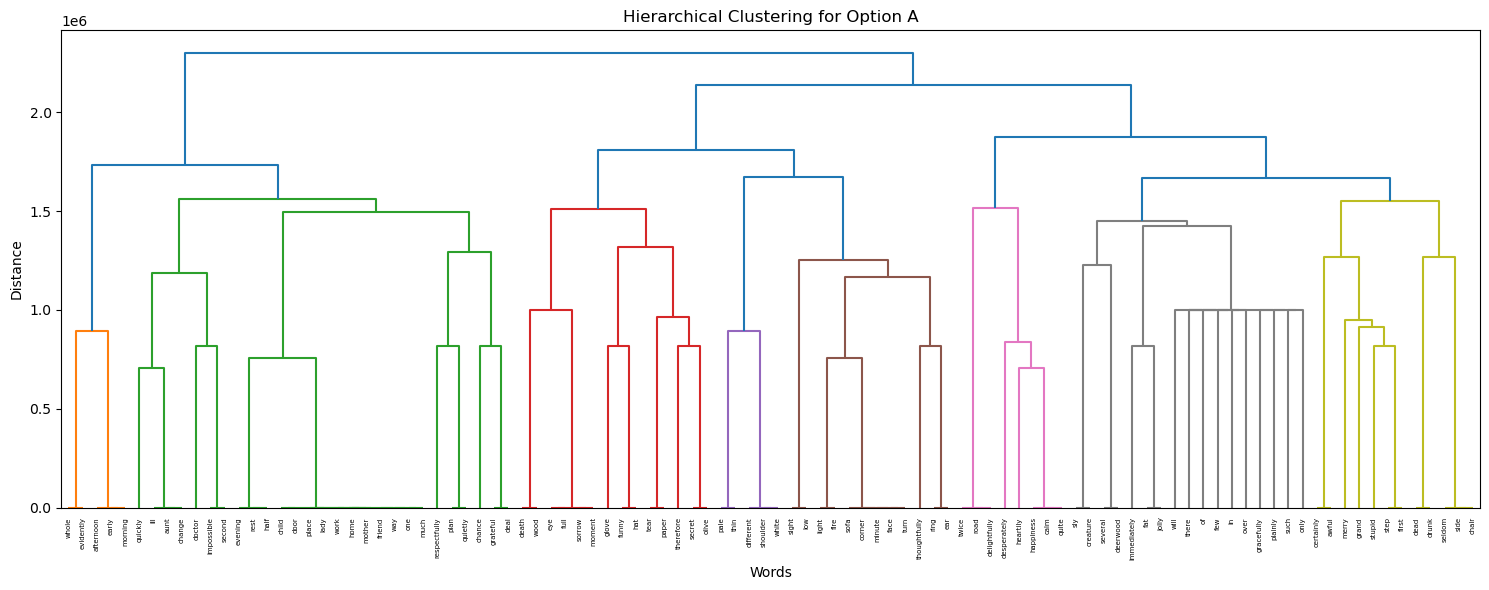

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# again loading the co occurance matrix for option A
optiona_matrix = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)

#for hierarchical clustering ensuring the matrix is square 
assert optiona_matrix.shape[0] == optiona_matrix.shape[1]
distance_matrix = 1 / (optiona_matrix + 1e-6)

# Converting to a condensed format for linkage
condensed = squareform(distance_matrix, checks=False)
# Applying the hierarchical clustering in list option A
linked = linkage(condensed, method='ward')

#plotting dendrogram
plt.figure(figsize=(15, 6))
dendrogram(linked, labels=optiona_matrix.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering for Option A")
plt.xlabel("Words")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


Code Cell 19: Hierarchical Clustering for Option B (LDA)

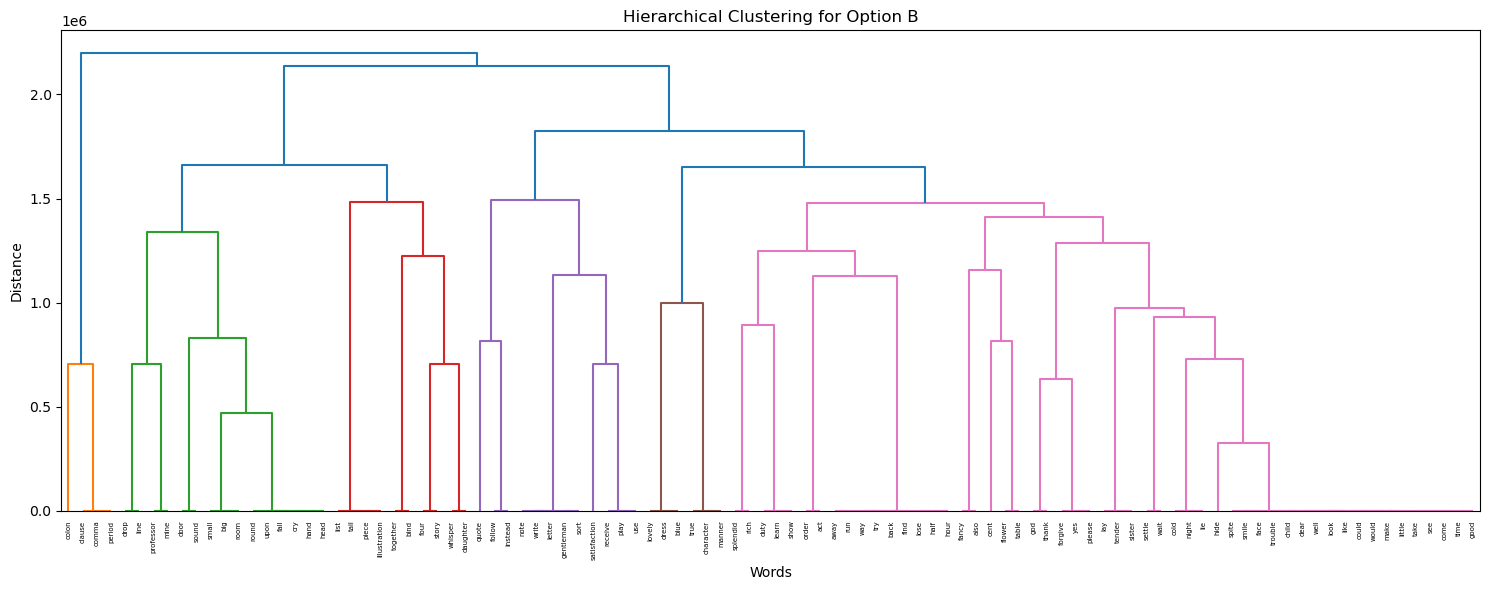

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
# performing the same for Option B
#loading the co-occurrence matrix for Option B
optiona_matrix = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)

assert optiona_matrix.shape[0] == optiona_matrix.shape[1], "Matrix must be square"

distance_matrix = 1 / (optiona_matrix + 1e-6)
condensed = squareform(distance_matrix, checks=False)

# Applying the hierarchical clustering in Option B
linked = linkage(condensed, method='ward')

plt.figure(figsize=(15, 6))
dendrogram(linked, labels=optiona_matrix.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering for Option B")
plt.xlabel("Words")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Code Cell -  20 - K-Means Clustering for List - Option A using POS

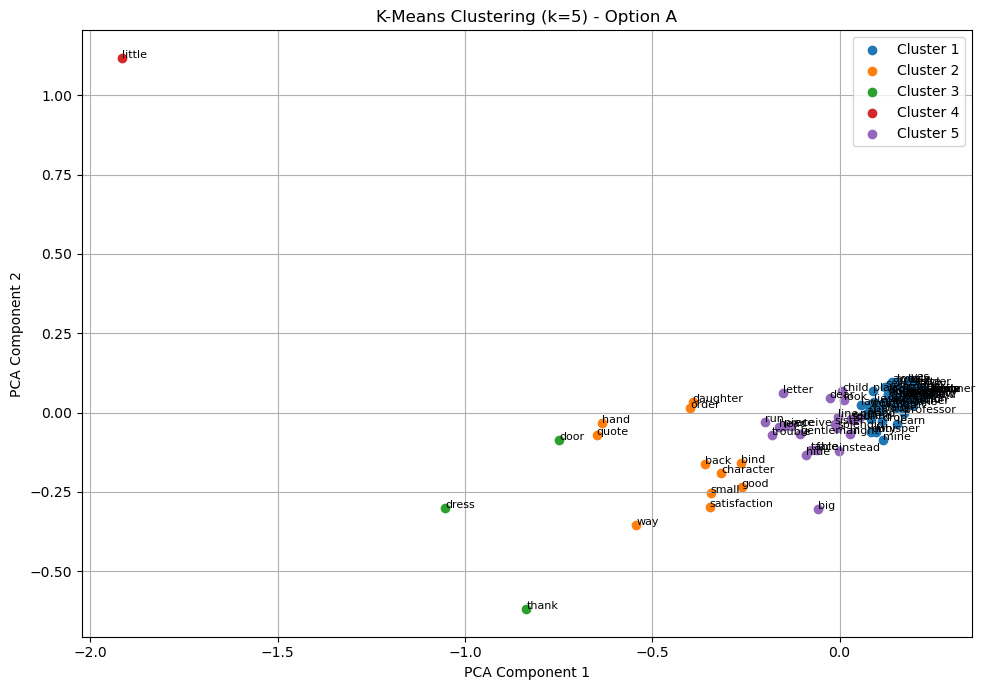

In [44]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# loading the coocurence matrix fir option A 
file_path_b = "cooccurrence_matrix_optiona.csv"
df_a = pd.read_csv(file_path_b, index_col=0)

#symmetry and diagonal zero in the matrix
for i in range(len(df_a)):
    for j in range(len(df_a)):
        if i != j:
            df_a.iloc[i, j] = (df_a.iloc[i, j] + df_a.iloc[j, i]) / 2
        else:
            df_a.iloc[i, j] = 0

# calculating distance
distance_matrix_a = 1 - df_a / df_a.values.max()

# PCA plotting with 2 dimensions 
pca = PCA(n_components=2)
reduced_a = pca.fit_transform(distance_matrix_a)

# K-Means clustering with 5 number of clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_a = kmeans.fit_predict(reduced_a)

# plotting
plt.figure(figsize=(10, 7))
for i in range(k):
    plt.scatter(reduced_a[labels_a == i, 0], reduced_a[labels_a == i, 1], label=f"Cluster {i+1}")
for i, word in enumerate(df_b.index):
    plt.text(reduced_a[i, 0], reduced_a[i, 1], word, fontsize=8)
plt.title("K-Means Clustering (k=5) - Option A")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("kmeans_clusters_optiona.png")
plt.show()


Code Cell -  21 - KMeans Clustering for Option B

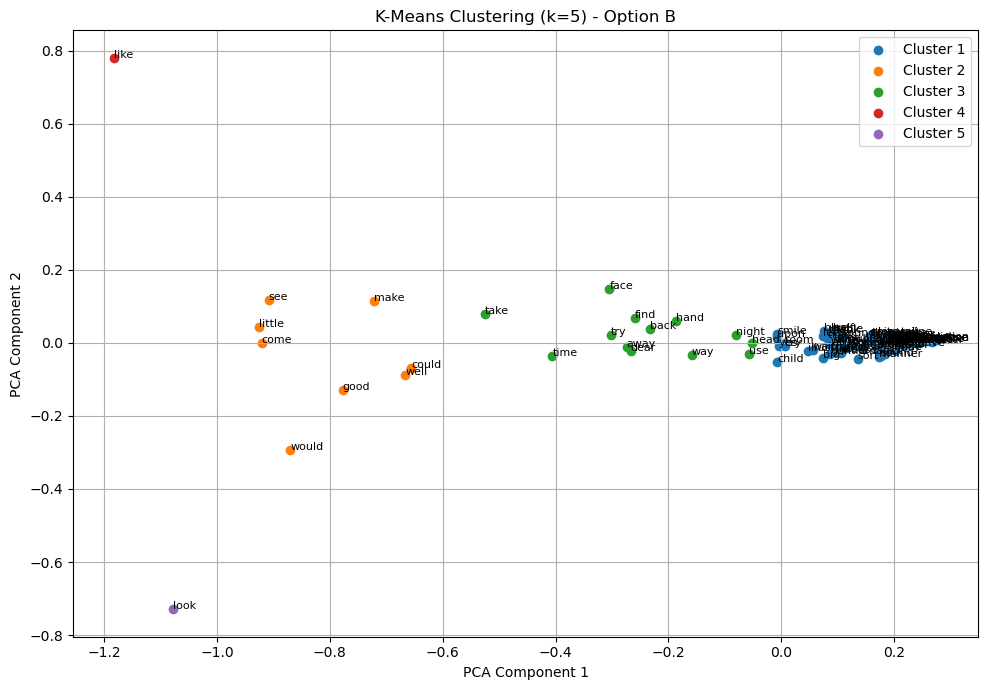

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# similarily using the co-occurence matrix of the Option B to plot the K-Means Clustering 
file_path_b = "cooccurrence_matrix_optionb.csv"
df_b = pd.read_csv(file_path_b, index_col=0)

for i in range(len(df_b)):
    for j in range(len(df_b)):
        if i != j:
            df_b.iloc[i, j] = (df_b.iloc[i, j] + df_b.iloc[j, i]) / 2
        else:
            df_b.iloc[i, j] = 0

distance_matrix_b = 1 - df_b / df_b.values.max()
pca = PCA(n_components=2)
reduced_b = pca.fit_transform(distance_matrix_b)

# K-Means clustering plotting for 5 
k = 5  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_b = kmeans.fit_predict(reduced_b)

plt.figure(figsize=(10, 7))
for i in range(k):
    plt.scatter(reduced_b[labels_b == i, 0], reduced_b[labels_b == i, 1], label=f"Cluster {i+1}")
for i, word in enumerate(df_b.index):
    plt.text(reduced_b[i, 0], reduced_b[i, 1], word, fontsize=8)
plt.title("K-Means Clustering (k=5) - Option B")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("kmeans_clusters_optionb.png")
plt.show()


Code Cell -  22 - Elbow Method for finding the optimal number of k of clustering

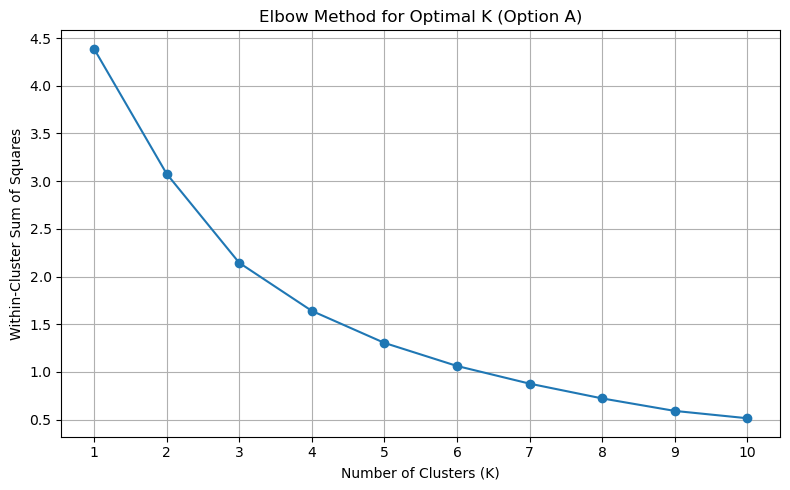

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df_a = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)

#normalizing the rows
normalized_a = df_a.div(df_a.sum(axis=1), axis=0).fillna(0)

# coverting to distance matrix
distance_matrix_a = 1 - normalized_a
for i in range(distance_matrix_a.shape[0]):
    distance_matrix_a.iloc[i, i] = 0

# PCA for dimensionality reduction with 2 dimension components
pca = PCA(n_components=2)
reduced_a = pca.fit_transform(distance_matrix_a)

# plotting the Elbow Method for Option A
wcss_a = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced_a)
    wcss_a.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss_a, marker='o')
plt.title("Elbow Method for Optimal K (Option A)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


Code Cell -  23 - K means Clustering with optimal number of clusters = 3

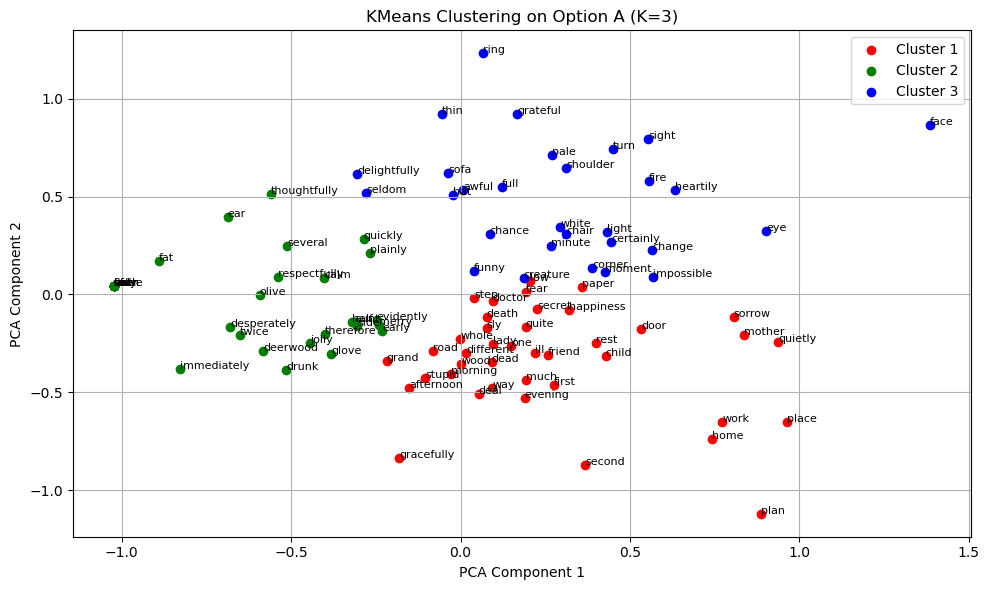

In [47]:
normalized_matrix_a = df_a.div(df_a.max(axis=1), axis=0).fillna(0)

pca = PCA(n_components=2, random_state=42)
pca_coords_a = pca.fit_transform(normalized_matrix_a)

kmeans_a = KMeans(n_clusters=3, random_state=42)
labels_a = kmeans_a.fit_predict(pca_coords_a)

plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for cluster_id in range(3):
    idx = labels_a == cluster_id
    plt.scatter(pca_coords_a[idx, 0], pca_coords_a[idx, 1], label=f"Cluster {cluster_id+1}", c=colors[cluster_id])
    for i, word in enumerate(normalized_matrix_a.index[idx]):
        plt.text(pca_coords_a[idx, 0][i], pca_coords_a[idx, 1][i], word, fontsize=8)

plt.title("KMeans Clustering on Option A (K=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Code Cell -  24 -  Elbow Method for finding the optimal number of k of clustering - Option B

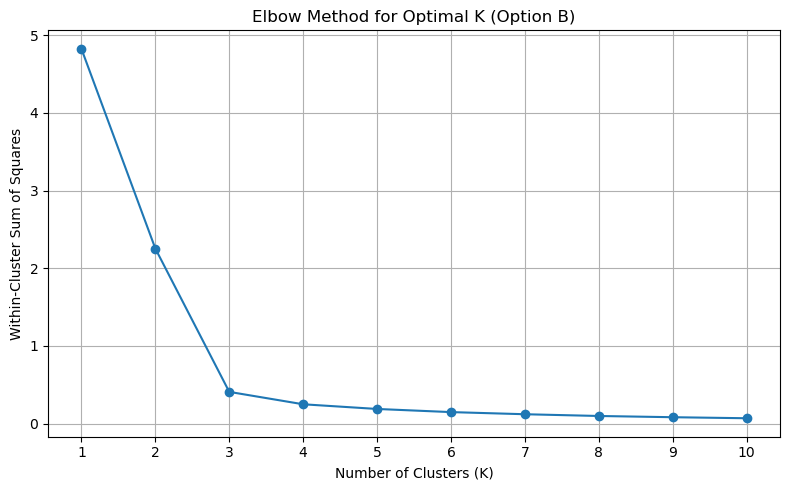

In [49]:
# similarly plotting the elbow method for the option B
df_b = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)


normalized_b = df_b.div(df_b.sum(axis=1), axis=0).fillna(0)

distance_matrix_b = 1 - normalized_b
for i in range(distance_matrix_b.shape[0]):
    distance_matrix_b.iloc[i, i] = 0

pca = PCA(n_components=2)
reduced = pca.fit_transform(distance_matrix_b)

wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K (Option B)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

## Code Cell -  25

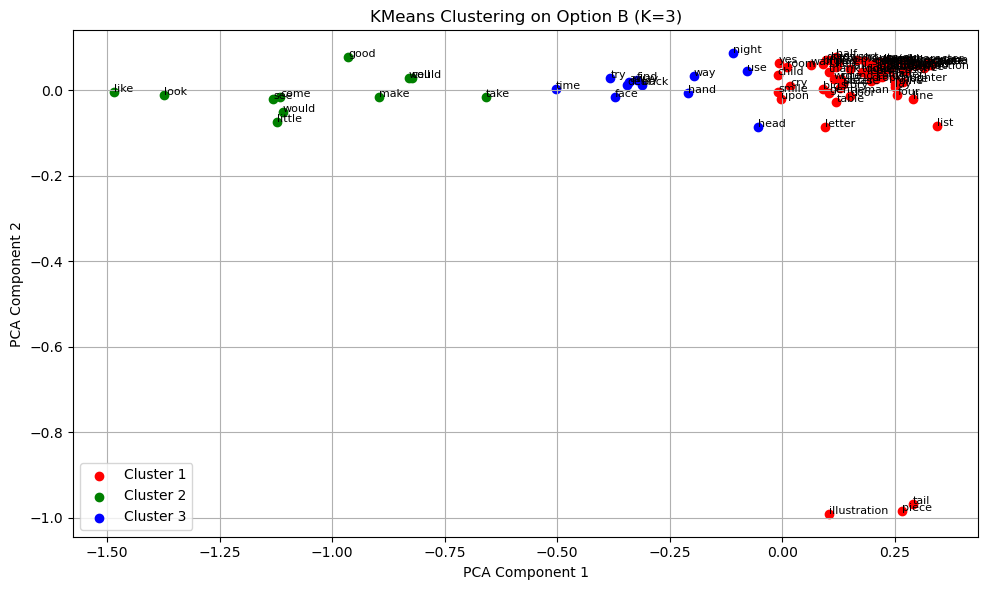

In [50]:
df_b = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)

df_b_norm = df_b / df_b.max().max()
distance_matrix_b = 1 - df_b_norm
np.fill_diagonal(distance_matrix_b.values, 0)

pca = PCA(n_components=2, random_state=42)
pca_coords_b = pca.fit_transform(distance_matrix_b)

kmeans_b = KMeans(n_clusters=3, random_state=42)
labels_b = kmeans_b.fit_predict(pca_coords_b)

words_b = df_b.index.tolist()
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_points = pca_coords_b[labels_b == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f"Cluster {i+1}")
for i, word in enumerate(words_b):
    plt.text(pca_coords_b[i, 0], pca_coords_b[i, 1], word, fontsize=8)

plt.title("KMeans Clustering on Option B (K=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Code Cell -  26 - Clustered word groups for Option A

In [52]:
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import squareform

cooccurrence_a = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)

#normalizing the matrix and convertng to a distance matrix
scaler = MinMaxScaler()
norm_matrix_a = scaler.fit_transform(cooccurrence_a)
distance_matrix_a = 1 - norm_matrix_a
for i in range(len(distance_matrix_a)):
    distance_matrix_a[i, i] = 0

pca = PCA(n_components=2)
pca_coords_a = pca.fit_transform(distance_matrix_a)

# performing KMeans clustering with K=3
kmeans_a = KMeans(n_clusters=3, random_state=42)
labels_a = kmeans_a.fit_predict(pca_coords_a)

# Grouping the words by clusters
optiona_words = cooccurrence_a.index.tolist()
clustered_words_a = {f"Cluster {i+1}": [] for i in range(3)}
for word, label in zip(optiona_words, labels_a):
    clustered_words_a[f"Cluster {label+1}"].append(word)

clustered_df_a = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in clustered_words_a.items()]))

print("Option A — Clustered Word Groups:\n")
display(clustered_df_a) 

Option A — Clustered Word Groups:



,Cluster 1,Cluster 2,Cluster 3
0,face,minute,stupid
1,eye,child,sly
2,mother,way,sofa
3,one,turn,death
4,NaN,home,creature
...,...,...,...
75,NaN,NaN,will
76,NaN,NaN,glove
77,NaN,NaN,thin
78,NaN,NaN,ear


Code Cell -  27 - Clustered word groups for Option B

In [53]:
cooccurrence_b = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)

# normalizing the matrix
scaler = MinMaxScaler()
norm_matrix_b = scaler.fit_transform(cooccurrence_b)
distance_matrix_b = 1 - norm_matrix_b
for i in range(len(distance_matrix_b)):
    distance_matrix_b[i, i] = 0

pca = PCA(n_components=2)
pca_coords_b = pca.fit_transform(distance_matrix_b)

# KMeans clustering (K=3)
kmeans_b = KMeans(n_clusters=3, random_state=42)
labels_b = kmeans_b.fit_predict(pca_coords_b)

optionb_words = cooccurrence_b.index.tolist()
clustered_words_b = {f"Cluster {i+1}": [] for i in range(3)}
for word, label in zip(optionb_words, labels_b):
    clustered_words_b[f"Cluster {label+1}"].append(word)

clustered_df_b = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in clustered_words_b.items()]))
clustered_df_b.to_csv("optionb_clustered_words.txt", sep="\t", index=False)

print("Option B — Clustered Word Groups:\n")
display(clustered_df_b) 

Option B — Clustered Word Groups:



,Cluster 1,Cluster 2,Cluster 3
0,whisper,could,take
1,half,well,away
2,gentleman,would,back
3,follow,make,find
4,door,see,way
...,...,...,...
71,trouble,NaN,NaN
72,manner,NaN,NaN
73,mine,NaN,NaN
74,use,NaN,NaN


Code Cell -  28 - Dijkstra's Distance Matrix - Option A

In [54]:
import networkx as nx

co_matrix_a = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)

normalized_a = co_matrix_a / co_matrix_a.max().max()
distance_matrix_a = 1 - normalized_a

distance_matrix_a = (distance_matrix_a + distance_matrix_a.T) / 2
np.fill_diagonal(distance_matrix_a.values, 0)

# graph for Dijkstra
G = nx.Graph()
words = distance_matrix_a.index.tolist()
for i, word_i in enumerate(words):
    for j, word_j in enumerate(words):
        if i != j:
            weight = distance_matrix_a.iloc[i, j]
            if weight > 0:
                G.add_edge(word_i, word_j, weight=weight)

# calculating the shortest paths between all the word pairs - option A
dijkstra_distances = pd.DataFrame(index=words, columns=words, dtype=float)
for source in words:
    lengths = nx.single_source_dijkstra_path_length(G, source)
    for target in lengths:
        dijkstra_distances.loc[source, target] = lengths[target]

dijkstra_distances.to_csv("dijkstra_distance_matrix_optiona.csv")

In [55]:
# Printing the dijkstra's distances 
flattened = dijkstra_distances.where(np.triu(np.ones(dijkstra_distances.shape), 1).astype(bool)).stack()
print(flattened.sort_values().head(10))

one     much      0.63
mother  one       0.71
way     one       0.74
home    mother    0.80
one     quite     0.81
minute  one       0.81
eye     one       0.82
mother  much      0.82
side    one       0.82
face    mother    0.82
dtype: float64


Code Cell -  30 - K-Means clustering on the PCA - Dijkstra distance

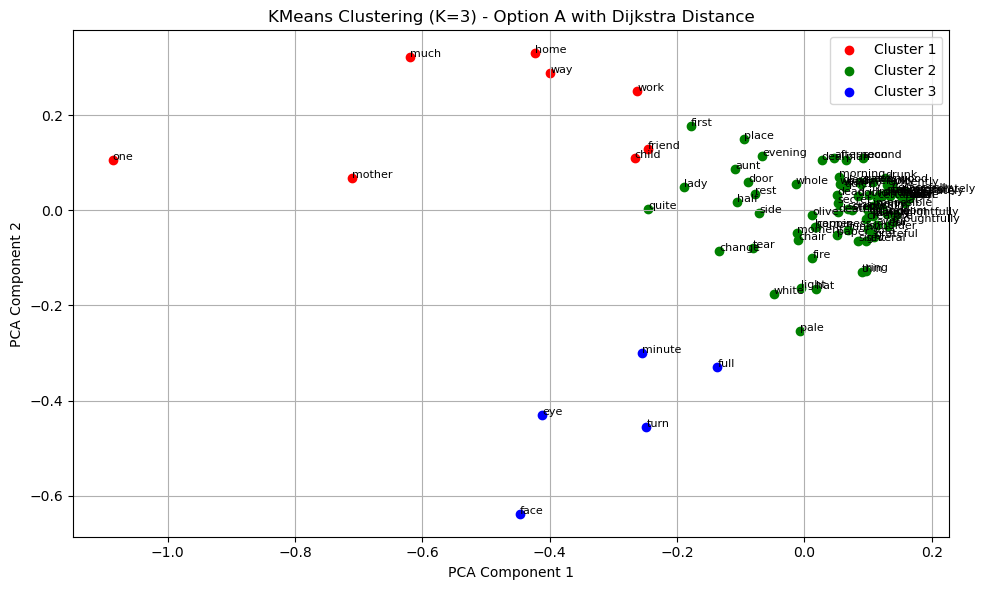

In [56]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dijkstra's distance matrix for Option A
dijkstra_df_a = pd.read_csv("dijkstra_distance_matrix_optiona.csv", index_col=0)
dijkstra_df_a.fillna(dijkstra_df_a.max().max(), inplace=True)

#PCA for the distance matrix
pca = PCA(n_components=2, random_state=42)
pca_coords_dijkstra_a = pca.fit_transform(dijkstra_df_a)

# KMeans clustering on the PCA for Dijkstra distance
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(pca_coords_dijkstra_a)

# plotting the clusters with word pairs 
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_points = pca_coords_dijkstra_a[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}", color=colors[i])
for i, word in enumerate(dijkstra_df_a.index):
    plt.text(pca_coords_dijkstra_a[i, 0], pca_coords_dijkstra_a[i, 1], word, fontsize=8)

plt.title("KMeans Clustering (K=3) - Option A with Dijkstra Distance")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Code Cell -  31 -  K-Means clustering on the PCA - Dijkstra distance

look    like      0.007407
would   like      0.012658
see     come      0.014286
        look      0.015385
back    come      0.015873
little  look      0.015873
well    like      0.017241
make    little    0.017241
like    good      0.017544
little  like      0.017857
dtype: float64


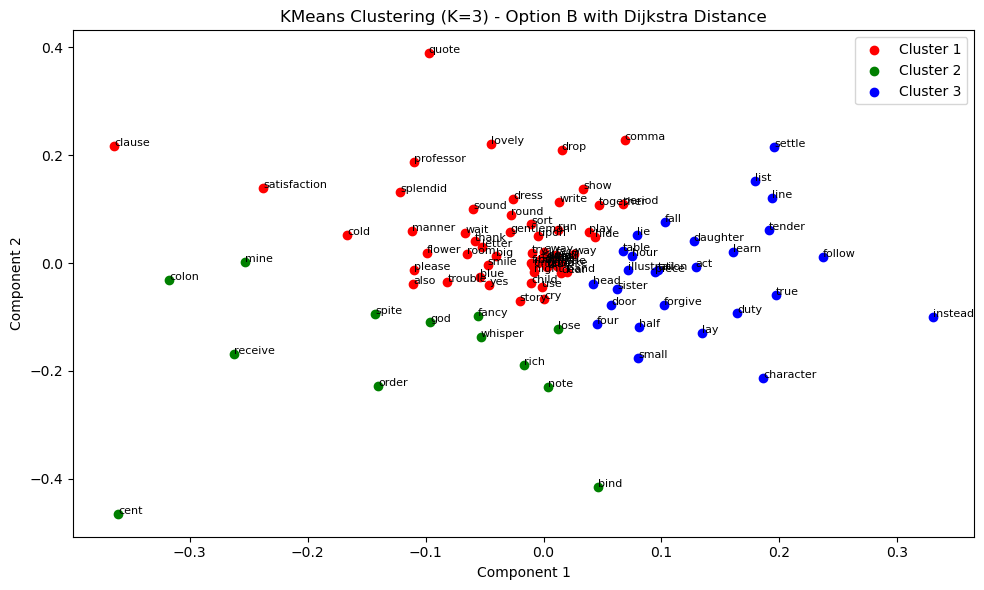

In [58]:
import networkx as nx
from scipy.spatial.distance import squareform
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cooccur_b = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)

# network graph creation
#  and calculating thr  Dijkstra-based distances
G = nx.Graph()
words = cooccur_b.columns

# Adding weight on the edges from co-occurrence (inverted to treat high co-occurrence as short distance)
for i in range(len(words)):
    for j in range(i+1, len(words)):
        w1, w2 = words[i], words[j]
        weight = cooccur_b.iloc[i, j]
        if weight > 0:
            G.add_edge(w1, w2, weight=1 / weight)

# Computed the shortest paths between all pairs
dijkstra_dist_b = pd.DataFrame(index=words, columns=words, dtype=float)
for source in words:
    lengths = nx.single_source_dijkstra_path_length(G, source)
    for target in words:
        dijkstra_dist_b.loc[source, target] = lengths.get(target, float('inf'))


dijkstra_dist_b.to_csv("dijkstra_distance_matrix_optionb.csv")

# flattening and sorting to non-zero distances
flattened_b = dijkstra_dist_b.where(np.triu(np.ones(dijkstra_dist_b.shape), 1).astype(bool)).stack()
print(flattened_b.sort_values().head(10))

# Re-clustering using KMeans after MDS projection
mds_b = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords_b = mds_b.fit_transform(dijkstra_dist_b.values)

kmeans_b = KMeans(n_clusters=3, random_state=42)
labels_b = kmeans_b.fit_predict(mds_coords_b)

# visualizing the cluster
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_points = mds_coords_b[labels_b == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}", color=colors[i])
for i, word in enumerate(words):
    plt.text(mds_coords_b[i, 0], mds_coords_b[i, 1], word, fontsize=8)

plt.title("KMeans Clustering (K=3) - Option B with Dijkstra Distance")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.tight_layout()
plt.savefig("kmeans_dijkstra_optionb.png")
plt.show()


Code Cell -  32 - summary similarity score, average distance and co-occurances between the pairs

In [61]:
import pandas as pd
import numpy as np
from itertools import combinations
cooccurrence_df = pd.read_csv("cooccurrence_matrix_optiona.csv", index_col=0)
dijkstra_df = pd.read_csv("dijkstra_distance_matrix_optiona.csv", index_col=0)

cooccurrence_df = cooccurrence_df.loc[dijkstra_df.index, dijkstra_df.columns]
words = cooccurrence_df.index.tolist()

# similarity scores between the word pairs
summary_data = []

for word1, word2 in combinations(words, 2):
    co_val = cooccurrence_df.loc[word1, word2]
    dist_val = dijkstra_df.loc[word1, word2]
    similarity = co_val / dist_val if dist_val != 0 else 0
    summary_data.append((word1, word2, co_val, dist_val, similarity))
summary_df = pd.DataFrame(summary_data, columns=["Word 1", "Word 2", "Co-occurrences", "Avg Distance", "Similarity Score"])
summary_df_sorted = summary_df.sort_values(by="Similarity Score", ascending=False)

print(summary_df_sorted.head(100))


      Word 1  Word 2  Co-occurrences  Avg Distance  Similarity Score
3962     one    much              37          0.63         58.730159
3014  mother     one              29          0.71         40.845070
2277     way     one              26          0.74         35.135135
2609    home  mother              20          0.80         25.000000
1077  minute     one              19          0.81         23.456790
...      ...     ...             ...           ...               ...
2270     way    half               5          0.95          5.263158
2892   place    much               5          0.95          5.263158
4108    much   first               5          0.95          5.263158
728     face   light               5          0.95          5.263158
3041  mother    lady               5          0.95          5.263158

[100 rows x 5 columns]


In [62]:
#SIMILARLY FOR THE Option B
cooccurrence_df_b = pd.read_csv("cooccurrence_matrix_optionb.csv", index_col=0)
dijkstra_df_b = pd.read_csv("dijkstra_distance_matrix_optionb.csv", index_col=0)

cooccurrence_df_b = cooccurrence_df_b.loc[dijkstra_df_b.index, dijkstra_df_b.columns]
words_b = cooccurrence_df_b.index.tolist()

summary_data_b = []

for word1, word2 in combinations(words_b, 2):
    co_val = cooccurrence_df_b.loc[word1, word2]
    dist_val = dijkstra_df_b.loc[word1, word2]
    similarity = co_val / dist_val if dist_val != 0 else 0
    summary_data_b.append((word1, word2, co_val, dist_val, similarity))

summary_df_b = pd.DataFrame(
    summary_data_b,
    columns=["Word 1", "Word 2", "Co-occurrences", "Avg Distance", "Similarity Score"]
)
# normalized score
summary_df_b["Scaled Score"] = summary_df_b["Similarity Score"] / summary_df_b["Similarity Score"].max()
summary_df_sorted_b = summary_df_b.sort_values(by="Similarity Score", ascending=False)

print(summary_df_sorted_b.head(10))

      Word 1  Word 2  Co-occurrences  Avg Distance  Similarity Score  \
4428    look    like             135      0.007407           18225.0   
3213   would    like              79      0.012658            6241.0   
3878     see    come              70      0.014286            4900.0   
3882     see    look              65      0.015385            4225.0   
1510    back    come              63      0.015873            3969.0   
3971  little    look              63      0.015873            3969.0   
829     well    like              58      0.017241            3364.0   
3309    make  little              58      0.017241            3364.0   
4632    like    good              57      0.017544            3249.0   
3181   would    make              56      0.017857            3136.0   

      Scaled Score  
4428      1.000000  
3213      0.342442  
3878      0.268861  
3882      0.231824  
1510      0.217778  
3971      0.217778  
829       0.184582  
3309      0.184582  
4632      0.178272